# Outline
- Building a spam detection model with GloVe and NLTK

## Text Normalization in NLP: Lemmatization vs Stemming
When processing natural language, it's important to reduce words to their base or root form. There are two main techniques for this:

- Stemming: Cuts off prefixes/suffixes to find the stem of a word.

- Lemmatization: Uses vocabulary and morphological analysis to return the base or dictionary form of a word (lemma).

### ⚖️ Comparison

| Feature              | WordNetLemmatizer | PorterStemmer  | SnowballStemmer |
|----------------------|-------------------|----------------|-----------------|
| Approach             | Lemmatization     | Stemming       | Stemming        |
| Vocabulary-aware     | ✅ Yes            | ❌ No          | ❌ No           |
| POS Support          | ✅ Yes            | ❌ No          | ❌ No           |
| Language Support     | English (via WordNet) | English | Multiple languages |
| Output Accuracy      | ✅ High           | ⚠️ Medium      | ✅ Better than Porter |
| Speed                | ⚠️ Slower         | ✅ Fast        | ✅ Fast         |

## NLTK
NLTK, which stands for Natural Language Toolkit, is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources.

### Stemmers
The key feature we are using today is the stemmer. It allow the reduction of words to their base or root form. For example, "running" to "run".


## **What Are Word Embeddings?**

Word embeddings are techniques to represent **words as vectors** in a continuous vector space, where **similar words have similar vectors**.

Instead of one-hot encoding like this:

| Word     | Vector      |
|----------|-------------|
| king     | [0, 0, 1, 0] |
| queen    | [0, 1, 0, 0] |
| man      | [1, 0, 0, 0] |

Embeddings would look like this:

| Word     | Vector (dim=4 example)     |
|----------|----------------------------|
| king     | [0.25, 0.89, -0.10, 0.34]  |
| queen    | [0.30, 0.85, -0.08, 0.33]  |
| man      | [0.45, 0.21, -0.34, 0.70]  |

---

In [8]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer # first iteration of stemmer by Porter
from nltk.stem.snowball import SnowballStemmer # second iteration of stemmer by Porter, that deals with more complex word morphologies
import spacy # OpenSource Python library for fast performance and easy-to-use interfaces for a wide range of NLP tasks
import string
import numpy as np
import pandas as pd
# import nltk
# nltk.download('all') # averaged_perceptron_tagger

In [9]:
import tensorflow as tf
import os
import zipfile

def download_and_read(url, encoding='latin-1'):
    # Download ZIP file (no auto-extract)
    zip_path = tf.keras.utils.get_file(
        fname=url.split('/')[-1],
        origin=url,
        extract=False,  # We'll extract manually
        cache_dir='.',
        cache_subdir='datasets'
    )

    # Extract manually
    extract_dir = os.path.join(os.path.dirname(zip_path), 'smsspamcollection')
    if not os.path.exists(extract_dir):
        os.makedirs(extract_dir)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)

    # Locate the extracted file
    local_file = os.path.join(extract_dir, 'SMSSpamCollection')

    # Read data
    labels, texts = [], []
    with open(local_file, "r", encoding=encoding) as fin:
        for line in fin:
            label, text = line.strip().split('\t')
            labels.append(1 if label == "spam" else 0)
            texts.append(text)
    return texts, labels

# Dataset URL
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Load the data
texts, labels = download_and_read(DATASET_URL)

# Quick check
print(texts[0])
print(labels[0])


2025-03-25 14:32:13.092780: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 14:32:13.107115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742909533.127402    3474 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742909533.133761    3474 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 14:32:13.160638: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
0


## Advanced words preprocessing methods

### SpaCy and NTLK API

In [10]:
!python -m spacy download en_core_web_sm


import spacy
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Load the small English model for spaCy
# This model includes various NLP tools such as tokenizers, lemmatizers, etc.
nlp = spacy.load("en_core_web_sm")

# Access the default set of stop words provided by spaCy for English
# Stop words are common words that are usually filtered out in NLP tasks because they carry less meaningful information
stop_words = nlp.Defaults.stop_words

# Access the set of punctuation characters from the string module
# Like stop words, punctuation is often removed in text preprocessing to focus on meaningful words
punctuations = string.punctuation

# Initialize the WordNet lemmatizer from NLTK
# Lemmatization reduces words to their base or root form, but unlike stemming, it ensures the root word belongs to the language
lemmatizer = WordNetLemmatizer()

# Initialize the Porter Stemmer from NLTK
ps = PorterStemmer()

# Initialize the Snowball Stemmer for English from NLTK
snowBallStemmer = SnowballStemmer("english")


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Custom stop words
Define a set of words that should not be treated as stop words despite being in the default stop words list


In [11]:
not_stop = {'nor', 'no', 'through', 'elsewhere', 'anyway', 'until', 'without', 'noone', 'otherwise', 'not', 'none', 'else', 'nobody', 'anyhow', 'less', 'whatever', 'never', 'few', 'rather', 'however', 'nowhere'}

# Initialize an empty set to hold the customized stop words
my_stop = set([])

# Iterate over the default stop words set
for i in stop_words:
    # If a default stop word is not in the not_stop set (i.e., it's not a word we want to keep), add it to the custom stop words set
    if i not in not_stop:
        my_stop.add(i)


print(my_stop)

{'herein', 'becoming', 'wherever', 'other', 'have', 'least', 'during', "'ve", 'give', 'is', 'whom', 'does', 'name', 'throughout', 'regarding', 'therefore', 'that', 'himself', 'except', 'against', 'so', 'due', 'doing', 'since', 'were', 'hereafter', 'anything', 'here', 'three', 'make', 'where', 'serious', 'sometimes', 'many', 'four', 'how', 'we', 'why', 'always', 'show', 'whoever', 'our', 'what', 'along', 'own', 'can', 'her', 'side', 'everything', 'this', 're', 'seeming', 'my', '‘ve', 'all', 'now', 'seem', 'anywhere', 'n‘t', 'much', 'same', 'them', 'may', "'m", '‘d', 'unless', 'around', 'sometime', 'more', '’ll', 'even', 'keep', 'get', 'namely', 'nothing', 'besides', 'between', 'it', 'twelve', 'onto', 'over', 'from', 'yourself', 'next', '‘m', 'see', 'using', 'but', 'somehow', 'cannot', 'should', 'yours', 'must', 'neither', 'latterly', 'often', 'hundred', "'d", 'their', 'another', 'put', 'first', 'by', 'thereupon', 'on', 'whereas', 'again', 'upon', 'been', 'after', 'hers', 'sixty', 'thus'

# Gensim

Please note that sometimes it is difficult to install

**Gensim** is an open-source Python library for **unsupervised topic modeling** and **natural language processing**, especially known for working with **word embeddings** like **Word2Vec**, **FastText**, and **GloVe**.

---

## What is Gensim?

- **Gensim** stands for *"Generate Similar"*.
- It is optimized for:
  - **Handling large text corpora** efficiently.
  - **Streaming data** (doesn’t require loading everything into memory).
  - **Training** and **using** vector space models (e.g., Word2Vec, LDA).

---

## Key Features

| Feature             | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| **Word Embeddings** | Word2Vec, FastText, and GloVe support                                       |
| **Topic Modeling**  | Latent Dirichlet Allocation (LDA), LSI, and HDP                             |
| **Similarity Queries** | Find similar documents or words                                           |
| **Memory Efficient**| Processes data using iterators, not full in-memory loading                  |
| **Pretrained Models** | Easy loading and usage of large-scale models like Word2Vec Google News     |

---

## Common Use Cases

- Semantic similarity (e.g., *"king" - "man" + "woman" ≈ "queen"*)
- Text classification
- Document clustering
- Recommendation systems
- Chatbot NLP pipelines

---

## Documentation

Official site: [https://radimrehurek.com/gensim](https://radimrehurek.com/gensim)

In [35]:
import gensim.downloader as api
from pprint import pprint

# Get full info dictionary
info = api.info()
models_info = info['models']

print(f"📦 Available Gensim Models: {len(models_info)} total\n")

# Print detailed info for each model
for name, meta in models_info.items():
    print(f"🔹 Model Name: {name}")
    print(f"   📄 Description : {meta.get('description', 'N/A')}")
    print(f"   📦 File Size   : {meta.get('file_size', 0) / 1024 / 1024:.2f} MB")
    print(f"   🔢 Num Vectors : {meta.get('num_records', 'N/A')}")
    print("-" * 60)


📦 Available Gensim Models: 13 total

🔹 Model Name: fasttext-wiki-news-subwords-300
   📄 Description : 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).
   📦 File Size   : 958.45 MB
   🔢 Num Vectors : 999999
------------------------------------------------------------
🔹 Model Name: conceptnet-numberbatch-17-06-300
   📄 Description : ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for further machine learning. ConceptNet Numberbatch is part of the ConceptNet open data project. ConceptNet provides lots of ways to compute with word meanings, one of which is word embeddings. ConceptNet Numberbatch is a snapshot of just the word embeddings. It is built using an ensemble that combines data from ConceptNet, word2vec, GloVe, and OpenSubtitles 2016, using a variation on retrofitting.
   📦 File Size

# 🔤 Word Embeddings: Word2Vec vs GloVe

Word embeddings are techniques used to convert words into numerical vectors that capture **semantic meaning** — similar words will have similar vector representations.

Two major methods are:

- **Word2Vec**: Predicts context from words or words from context.
- **GloVe**: Uses word co-occurrence statistics across the entire corpus.

---

## 🧠 Word2Vec

- **Developed by**: Google (2013)
- **Architecture**:
  - **CBOW (Continuous Bag of Words)**: Predicts the target word from surrounding context.
  - **Skip-Gram**: Predicts the context words from the target word.
- **Training Objective**: Maximize probability of context words given a word (or vice versa).
- **Local Context**: Learns embeddings based on sliding window context.

### Example Code
```python
from gensim.models import Word2Vec

sentences = [["the", "cat", "sat", "on", "the", "mat"],
             ["dogs", "run", "fast"]]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

print(model.wv["cat"])  # vector representation of "cat"
```

### Pros
- Learns efficient embeddings from context.
- Captures semantic and syntactic relationships (e.g., *king - man + woman ≈ queen*).

---

## 📦 GloVe (Global Vectors for Word Representation)

- **Developed by**: Stanford (2014)
- **Training Objective**: Factorizes a word co-occurrence matrix to learn word vectors.
- **Global Context**: Uses statistics from the entire corpus (not just local window).

### Example Code (Using `gensim`)
```python
from gensim.models import KeyedVectors

# Load pretrained GloVe converted to word2vec format
model = KeyedVectors.load_word2vec_format("glove.6B.100d.word2vec.txt", binary=False)

print(model["cat"])  # vector for "cat"
```

### Pros
- Incorporates global word co-occurrence information.
- Often yields better results on similarity tasks than Word2Vec.

---

## ⚖️ Comparison

| Feature            | Word2Vec                  | GloVe                           |
|--------------------|---------------------------|---------------------------------|
| Developed by       | Google (2013)             | Stanford (2014)                 |
| Approach           | Predictive (context-based)| Count-based (co-occurrence)     |
| Context Type       | Local (window)            | Global (corpus-wide)            |
| Architectures      | CBOW, Skip-Gram           | Matrix Factorization            |
| Pre-trained Models | Google News, others       | Common Crawl, Wikipedia         |
| Speed              | Fast                      | Fast                            |
| Semantic Power     | ✅ Strong                 | ✅ Strong                        |


# Building a spam detection model with GloVe

## GloVe: Global Vectors for Word Representation
GloVe is an unsupervised learning algorithm designed to generate vector representations for words. Unlike traditional methods that primarily focus on local context, GloVe stands out by integrating global statistics of a corpus into its learning process.

### How GloVe Works
GloVe captures vector representations by examining the co-occurrence frequencies of words across the entire dataset. This approach allows it to consider both the local context of words (similar to Word2Vec) and the broader, global relationships between words based on their co-occurrence patterns. The result is a comprehensive embedding that provides a richer understanding of word meanings, effectively bridging the gap between local semantic relationships and global lexical patterns.

### GloVe vs. Word2Vec
While Word2Vec learns word vectors by either predicting a word given its context (Continuous Bag of Words, CBOW) or predicting the context given a word (Skip-Gram), GloVe adopts a different strategy. It focuses on the aggregate global statistics of word co-occurrences throughout the entire text corpus. This method not only considers the immediate context but also leverages the frequency with which words appear together, thereby capturing a wide spectrum of semantic relationships.



In [13]:
wv = gensim.downloader.load('glove-twitter-50')

## Preprocessing

### Function

In [14]:
def sent_vec(sent, wv):
    """
    Evaluate the average vector for a sentence.

    Args:
    sent: Iterable of words (tokens) in a sentence.
    wv: GloVe model or similar (like Word2Vec), providing vector representations for words.

    Returns:
    numpy.ndarray: The average vector representing the sentence.
    """
    # Extract the vectors for words found in the model's vocabulary
    word_vectors = np.array([wv[w] for w in sent if w in wv])

    if len(word_vectors) == 0:
        # If no words in the sentence are found in the model, return a zero vector
        return np.zeros(wv.vector_size)

    # Compute the average vector across all extracted word vectors
    avg_vector = np.mean(word_vectors, axis=0)

    return avg_vector

def spacy_tokenizer(sentence):
    # Tokenize, lemmatize, filter stopwords/punctuations, and check if alphabetical in one step
    tokens = [
        snowBallStemmer.stem(word.lemma_.lower().strip())
        for word in nlp(sentence)
        if word.lemma_.lower().strip() not in my_stop
        and word.lemma_.lower().strip() not in punctuations
        and word.lemma_.isalpha() # alphabetic character check
    ]
    return tokens

# For batch processing (more efficient if spam_df['content'] is large)
def tokenize_texts(texts):
    return [spacy_tokenizer(doc) for doc in nlp.pipe(texts, batch_size=20)]

### Ops

In [15]:
from nltk.stem.snowball import SnowballStemmer
import spacy

# Load SpaCy model with disabled components for efficiency
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Assuming snowBallStemmer and my_stop are defined
# Convert my_stop and punctuations to sets for faster lookup
my_stop = set(my_stop)  # Assuming my_stop is defined
punctuations = set(string.punctuation)  # Assuming punctuations are defined

snowBallStemmer = SnowballStemmer(language="english")

In [16]:
spam_df = pd.DataFrame(texts, columns=['content'], index=range(0, len(texts)))
spam_df['label'] = labels

data = pd.DataFrame()
data["sent"] = tokenize_texts(spam_df['content'])

In [17]:
data['vec'] = data['sent'].apply(lambda x: sent_vec(x, wv))

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['v1'] = le.fit_transform(spam_df['label'])

In [19]:
from sklearn.model_selection import train_test_split
X = data['vec'].to_list()
y = data['v1'].to_list()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)


In [21]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 5.4 MB/s eta 0:00:0000:01m00:01


In [ ]:
# Import various ensemble and individual classifiers from scikit-learn
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression       # Linear model
from sklearn.svm import SVC                               # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier           # Decision Tree
from sklearn.neighbors import KNeighborsClassifier        # K-Nearest Neighbors
from sklearn.ensemble import (                            # Ensemble methods
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier
)
import xgboost as xgb                                     # XGBoost library
from sklearn import metrics                               # Evaluation metrics

# Initialize individual classifiers with specific hyperparameters

# Logistic Regression with L1 regularization (sparse weights)
lg = LogisticRegression(penalty='l1', solver='liblinear')

# Support Vector Machine with sigmoid kernel and gamma=1.0
sv = SVC(kernel='sigmoid', gamma=1.0)

# Decision Tree with max depth of 5 (to prevent overfitting)
dtc = DecisionTreeClassifier(max_depth=5)

# K-Nearest Neighbors (default settings)
knn = KNeighborsClassifier()

# Random Forest with 50 trees and a fixed random seed
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

# Extra Trees (similar to Random Forest but more randomized)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# AdaBoost (adaptive boosting) with 50 weak learners
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

# Bagging (bootstrap aggregating) classifier with 50 estimators
bg = BaggingClassifier(n_estimators=50, random_state=2)

# Gradient Boosting with 50 boosting stages
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)

# XGBoost classifier with 50 trees and fixed seed
xgb = xgb.XGBClassifier(n_estimators=50, random_state=2)


In [23]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    pre_score = metrics.precision_score(y_test,pr)

    return acc_score,pre_score


In [24]:
acc_score = {}
pre_score = {}
clfs= {
    'LR':lg,
    'SVM':sv,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
    'XGB':xgb
}
for name,clf in clfs.items():
    current_score,current_precision = score_prediction(clf, X_train, X_test, y_train, y_test)

    acc_score[name]=current_score
    pre_score[name]=current_precision


In [25]:
from sklearn.ensemble import VotingClassifier

estimators=[]
for name,clf in clfs.items():
    estimators.append((name,clf))

voting = VotingClassifier(estimators=estimators,voting='hard')
voting.fit(X_train, y_train)


VotingClassifier(estimators=[('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('SVM', SVC(gamma=1.0, kernel='sigmoid')),
                             ('DTC', DecisionTreeClassifier(max_depth=5)),
                             ('KNN', KNeighborsClassifier()),
                             ('RFC',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('ABC', AdaBoostClassifi...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...))])

🔍 Evaluation Metrics
✅ Accuracy : 0.9555
🎯 Precision: 0.9371
📥 Recall   : 0.7166
🏆 F1 Score : 0.8121

📊 Confusion Matrix (Raw Counts):
  True Negative: 1198
 False Positive: 9
 False Negative: 53
  True Positive: 134


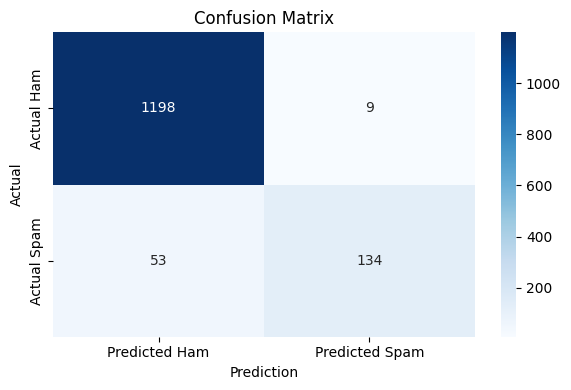


📄 Detailed Classification Report:

              precision    recall  f1-score   support

         Ham       0.96      0.99      0.97      1207
        Spam       0.94      0.72      0.81       187

    accuracy                           0.96      1394
   macro avg       0.95      0.85      0.89      1394
weighted avg       0.95      0.96      0.95      1394



In [27]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predict
y_pred = voting.predict(X_test)

# Basic metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Print metrics
print("🔍 Evaluation Metrics")
print(f"✅ Accuracy : {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"📥 Recall   : {recall:.4f}")
print(f"🏆 F1 Score : {f1:.4f}")

# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
cm_dict = dict(zip(cm_labels, cm.ravel()))

print("\n📊 Confusion Matrix (Raw Counts):")
for label, count in cm_dict.items():
    print(f"{label:>15}: {count}")

# Visualize confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print("\n📄 Detailed Classification Report:\n")
report = metrics.classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
print(report)


# 📝 Exercise: Exploring Semantic Relationships with GloVe

#### 📚 Description

In this exercise, you'll use the **pretrained GloVe model (`glove-wiki-gigaword-100`)** to explore semantic relationships between words. Your tasks are:

1. **Load the pretrained GloVe model** using Gensim's downloader.
2. Use it to:
   - Find the **most similar words** to a given word.
   - Solve **word analogies** (e.g., _king - man + woman = ?_).
   - Compute **similarity** between pairs of words.
3. Reflect on how GloVe captures relationships between words and how it differs from Word2Vec.

#### 🔧 Instructions

- Use `gensim.downloader` to load and interact with the model.
- Suggested words/analogies to try:
  - Similar words: `"king"`, `"computer"`, `"school"`
  - Analogy: `"king" - "man" + "woman"`
  - Word pairs: `("cat", "dog")`, `("book", "banana")`

> 💡 **Note**: GloVe vectors are trained on large text corpora and provide a dense representation of meaning. This specific model (`glove-wiki-gigaword-100`) contains 100-dimensional embeddings trained on Wikipedia and Gigaword.

---

### ✅ Solution (in Python)

In [29]:
import gensim.downloader as api

model = api.load("glove-wiki-gigaword-100")  # Much smaller & fast

# Example usage
print("Most similar to 'king':")
print(model.most_similar("king"))

print("\nAnalogy: king - man + woman = ?")
print(model.most_similar(positive=["king", "woman"], negative=["man"], topn=1))

print("\nSimilarity between 'cat' and 'dog':", model.similarity("cat", "dog"))


[==================================================] 100.0% 128.1/128.1MB downloaded
Most similar to 'king':
[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]

Analogy: king - man + woman = ?
[('queen', 0.7698540687561035)]

Similarity between 'cat' and 'dog': 0.8798075


# Exercise: Train Your Own Word2Vec Model on a Small Text Corpus

#### Description

In this exercise, you'll train a **Word2Vec model** from scratch using Gensim on a small sample dataset (such as a list of simple sentences). This will help you understand how word vectors are learned based on **context**.

#### Objectives

1. Prepare a small text corpus (manually or with NLTK).
2. Tokenize and preprocess the text (lowercase, remove punctuation, etc.).
3. Train a Word2Vec model using Gensim.
4. Explore:
   - Most similar words
   - Word similarity scores
   - Word analogies

---

### Suggested Workflow

#### 1. Tokenize a small corpus (or load a sample one like `nltk.corpus.brown`)
#### 2. Train `Word2Vec` using `gensim.models.Word2Vec`
#### 3. Play with `.most_similar()` and `.similarity()`

---

### 💡 Notes

- You can replace `brown` with your own list of sentences.
- Adjust `vector_size`, `window`, and `min_count` to see how they affect results.
- This approach avoids downloading large files and still teaches key Word2Vec concepts.

---

### Solution

In [30]:
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
import string

# 1. Download and load the Brown corpus
nltk.download('brown')
nltk.download('punkt')

# 2. Use a subset of Brown corpus for speed
sentences = brown.sents(categories='news')[:5000]

# 3. Preprocess: lowercase and remove punctuation
def clean(sentence):
    return [word.lower() for word in sentence if word.isalpha()]

cleaned_sentences = [clean(sent) for sent in sentences if len(sent) > 2]

# 4. Train a Word2Vec model
model = Word2Vec(sentences=cleaned_sentences, vector_size=100, window=5, min_count=2, workers=2)

# 5. Explore model
print("Most similar to 'government':")
print(model.wv.most_similar("government"))

print("\nSimilarity between 'president' and 'leader':")
print(model.wv.similarity("president", "leader"))

print("\nAnalogy: king - man + woman = ? (if vocab allows)")
try:
    print(model.wv.most_similar(positive=["king", "woman"], negative=["man"]))
except KeyError:
    print("Words not found in the vocabulary. Try a different analogy.")

[nltk_data] Downloading package brown to /home/fabio/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/fabio/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Most similar to 'government':
[('from', 0.9998201727867126), ('up', 0.9998200535774231), ('his', 0.9998137950897217), ('an', 0.9998091459274292), ('a', 0.9998082518577576), ('but', 0.9998072981834412), ('or', 0.9998056292533875), ('which', 0.9998018145561218), ('her', 0.9997975826263428), ('who', 0.99979567527771)]

Similarity between 'president' and 'leader':
0.99913955

Analogy: king - man + woman = ? (if vocab allows)
[('fear', 0.960841178894043), ('win', 0.9602473974227905), ('vienna', 0.9600226283073425), ('whom', 0.9599260091781616), ('working', 0.9598702192306519), ('institutions', 0.9595360159873962), ('tomorrow', 0.9594978094100952), ('personal', 0.9591019749641418), ('effort', 0.9589598774909973), ('road', 0.9589173197746277)]
